## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Commented out as goolge colab comes with these libraries pre-installed with the latest version
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
# libraries for data manipulation and numerical operation
import numpy as np
import pandas as pd

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries for metrics
from sklearn.metrics import(
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)

# library for statistical analysis
import scipy.stats as stats

In [4]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/AI_ML_PGP/Projects/PersonalLoanCampaignModel/Loan_Modelling.csv')
df.head() # checking dataset is loaded

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

In [7]:
df.head() # checking the first 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail() # checking the last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.shape # check the shape of the data

(5000, 14)

In [10]:
df.info() # summary information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
df.describe().T # summary statistics of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
df.isnull().sum().sum() # check for missing values

0

In [13]:
df.duplicated().sum() # check for duplicate values

0

In [14]:
df['ID'].nunique() # check for unique values for ID column

5000

In [15]:
df[df['Experience'] < 0]['Experience'].count() # check for negative values in Experience column

52

### **Observations**
* Dataset has 5000 rows and 14 columns
* Data types for all columns are numeric
* `ID` column is the unique identifier and this can be dropped
* `Age`, `Experience`, `Income`, `CCAvg` and `Mortgage` columns are numeric columns and represent respective numeric values for these features
* `Family` represents discreet numerical values which we can use for categorical analysis
* Though the data type for `ZIPCode` is int64, it is a categorical feature.
* `Education` is a categorical feature of ordinal type
* `Securities_Account`, `CD_Account`, `Online` and `CreditCard` columns are the numerical representation of the respective categorical features. They are mapped to 1 and 0 for Yes and No values respectively.
* `Personal_Loan` is our target variable and it has following classes:<br/>
&nbsp; &nbsp; &nbsp; &nbsp; **1:** Customer accepted the loan in the last campaign <br/>
&nbsp; &nbsp; &nbsp; &nbsp; **0:** Customer didn't accept the loan in the last campaign<br/>
Our goal is to build the machine learning model, so we can predict the outcome of `Personal_Loan` for future campaign, identify the important features and identify the customer segments for targeting.
* Dataset doesn't contain any duplicate rows
* Dataset doesn't contain any missing value
* `Experience` column in the dataset contains 52 negative entries, these are more likely data entry error. We will convert these entries to postive number.

### Creating a copy of the data and dropping the ID column and coverting negative experience values to positive numbers

In [16]:
data = df.copy() # creating a copy of the data
data.drop(columns='ID', inplace=True) # dropping the ID column
data.head() # checking the first 5 rows of the data

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
data['Experience'] = data['Experience'].apply(lambda x: abs(x)) # converting negative experience values to positive numbers
data[data['Experience'] < 0]['Experience'].count()

0

In [18]:
# statistical summary of data after data cleansing
data['Experience'].describe().T

,Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


* After converting negative values to positive, the statistical summary for the experience column is almost unchanged apart from the minimum experience of customers is now 0.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
**Ans:** The distribution of mortgage is highly right skewed. There are outliers in the distribution. Though 69.24% customers have no mortgage, the average mortgage debt is around \\$56.4k, and, the median of mortgage debt is 0. 25% customers have mortgage debt of \\$101k or more. 5.82% customers have mortgage debt of \\$252.5k or more which are showed as outliers in the boxplot distribution.
From the 30.76% customers who have mortgage, Around 82.4% of those customers have a mortgage debt above \\$100k.
2. How many customers have credit cards?
**Ans:** 4894 customers have credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
**Ans:** `Income`, `CCAvg`, `Mortgage`, `Family`, `Education` and `CD_Account` have strong correlation with the target attribute `Personal_Loan`
4. How does a customer's interest in purchasing a loan vary with their age?
**Ans:** Customers who have accepted loan offer have slightly higher minimum age than who didn't. The 25th percentile age, median age and the 75th percentile age of customers who accepted the loan offer and who didn't accept the loan are same respectively.
5. How does a customer's interest in purchasing a loan vary with their education?
**Ans:** Customers with graduate level or advanced/professional level education accepted the loan offer more compared to customers with undergraduate level.

### Univariate Analysis

In [19]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'] # numerical columns
cat_cols = ['Family','Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode'] # categorical columns

In [20]:
def histplot_and_boxplot(data, col):
  fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6), sharex= True, gridspec_kw={"height_ratios":(0.30,0.70)})
  fig.suptitle(f'Distribution of {col}')
  sns.boxplot(data = data, x = col, ax = ax1, showmeans = True)
  sns.histplot(data = data, x = col, ax = ax2, kde = False)
  ax2.axvline(data[col].mean(), color = 'green', linestyle = '--')
  ax2.axvline(data[col].median(), color = 'red', linestyle = '--')
  plt.tight_layout()
  plt.show()

def labelled_countplot(data, col):
  ax = sns.countplot(data = data, x = col)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{round((count/data.shape[0])*100, 2)}%'
    ax.annotate(percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
            textcoords='offset points')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.show()

**Univariate Analysis of Numerical data**

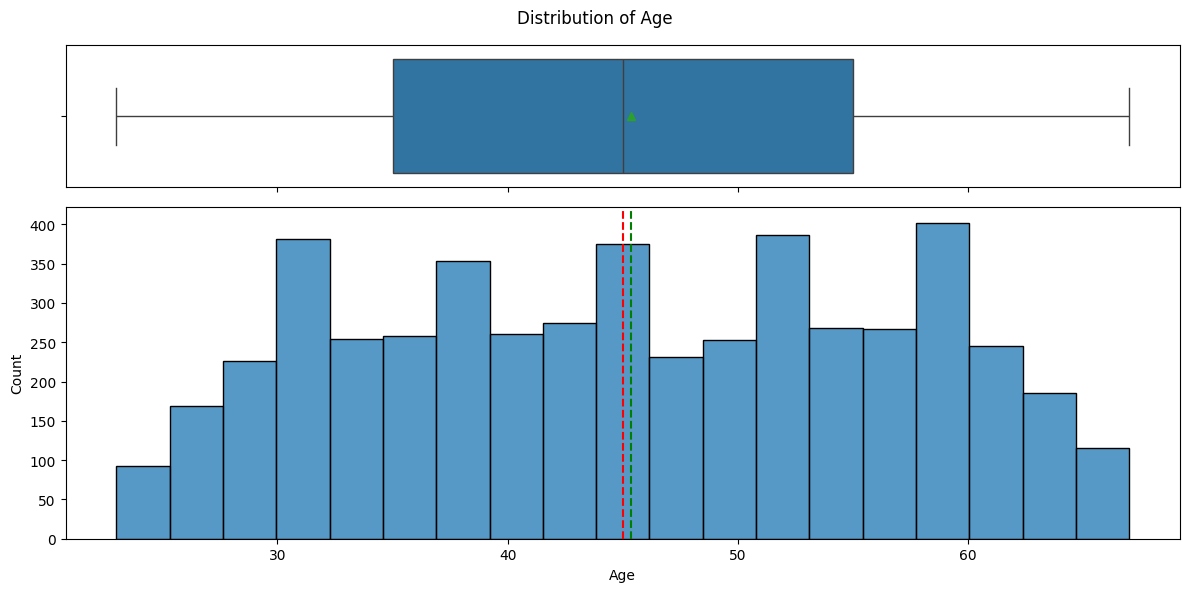

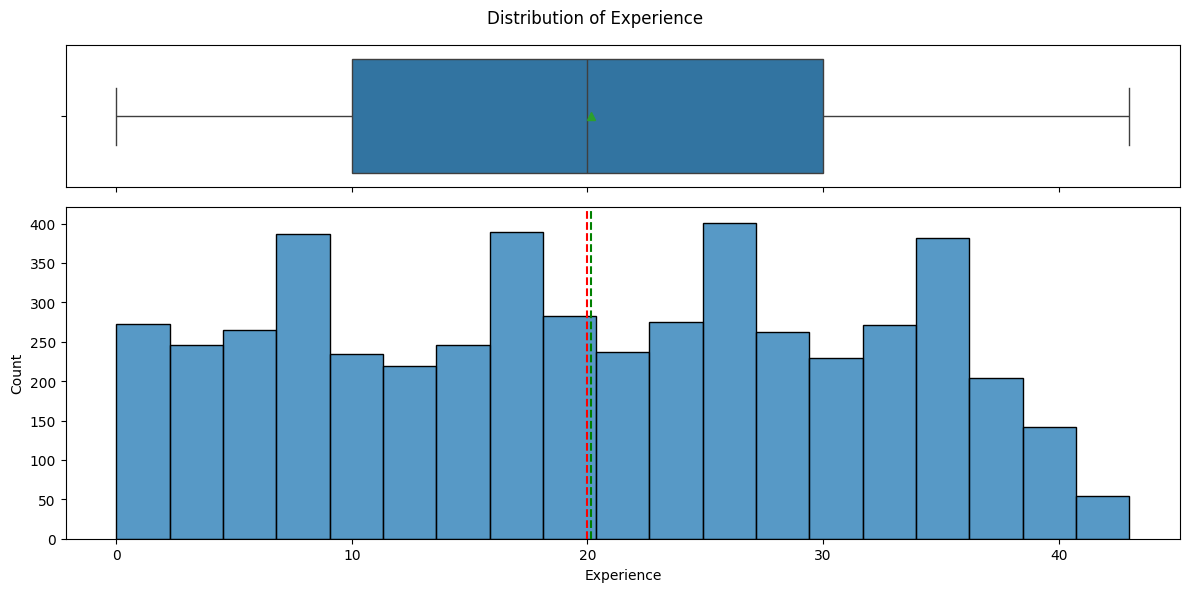

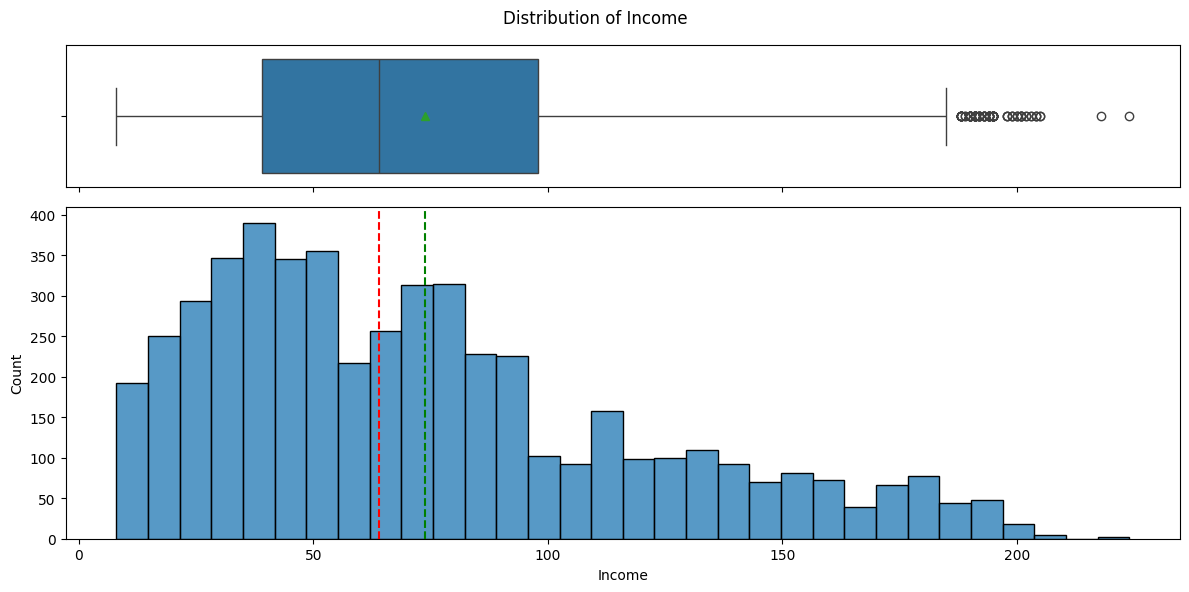

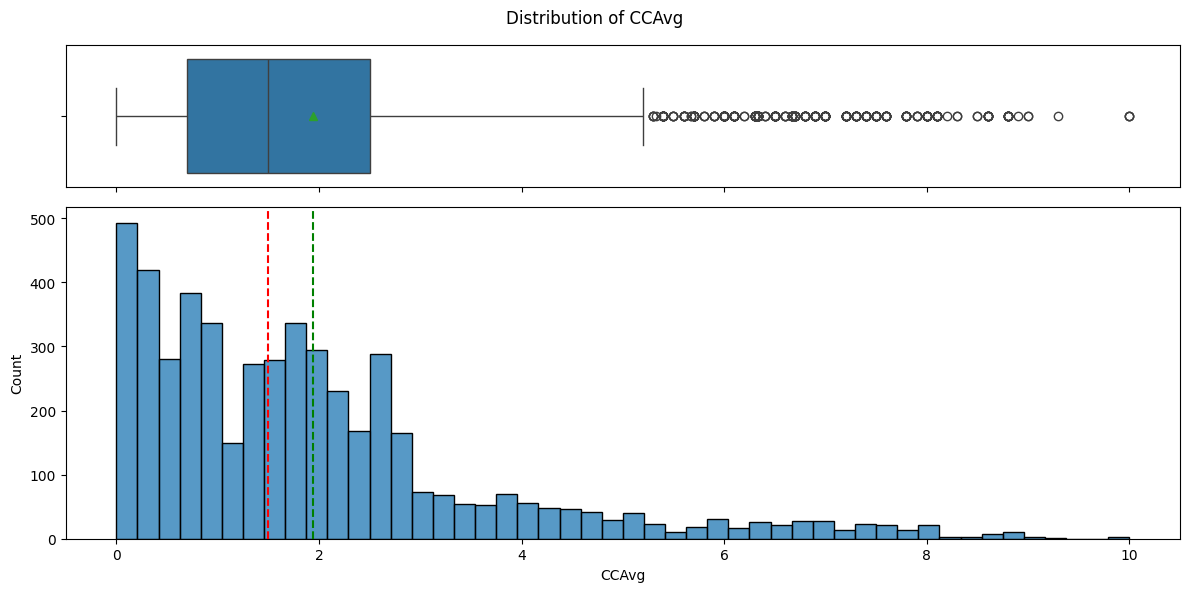

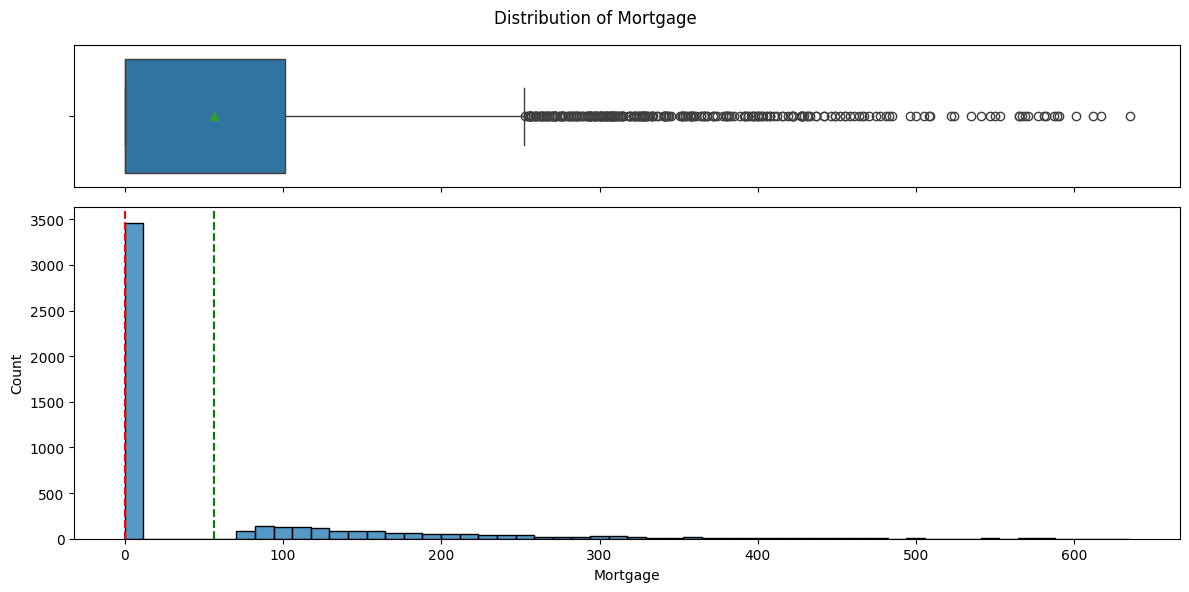

In [21]:
for col in num_cols:
  histplot_and_boxplot(data, col)

* There are significant number of customers who don't have any mortgage and some customers have high mortgage debt. Let's analyse the mortgage distribution further.
* There are customers who don't have any avg. monthly spending on credit card and there are some outliers in the distribution of average monthly credit card spending. We will also analyse this distribution further.

In [22]:
# customers with no mortgage
no_mortgage = data[data['Mortgage'] == 0]['Mortgage'].count()
Percentage_of_Customers_with_No_Mortgage = round((no_mortgage/data.shape[0])*100, 2)
pd.DataFrame([no_mortgage, Percentage_of_Customers_with_No_Mortgage], index = ['No Mortgage', 'Percentage']).T

,No Mortgage,Percentage
0,3462.0,69.24


In [23]:
# Customers with high mortgage debt
IQR = data['Mortgage'].quantile(0.75) - data['Mortgage'].quantile(0.25)
high_mortgage = data[data['Mortgage'] >= (data['Mortgage'].quantile(0.75) + 1.5*IQR)]['Mortgage'].count()
high_mortgage_percentage = round((high_mortgage/data.shape[0])*100, 2)
print("Upper whisker value:", data['Mortgage'].quantile(0.75) + 1.5*IQR)
pd.DataFrame([high_mortgage, high_mortgage_percentage], index = ['Count of High Mortgage', 'Percentage']).T

Upper whisker value: 252.5


,Count of High Mortgage,Percentage
0,291.0,5.82


In [24]:
# customers percentage with mortgage debt above $100k among the customers who have mortgage
mortgage_debt_100k = data[data['Mortgage'] >= 100]['Mortgage'].count()
mortgage_debt_percentage_100k = round((mortgage_debt_100k/1538)*100, 2)
pd.DataFrame([mortgage_debt_100k, mortgage_debt_percentage_100k], index = ['Mortgage holders with $100k or more', 'Percentage(Among mortgage all holders)']).T

,Mortgage holders with $100k or more,Percentage(Among mortgage all holders)
0,1268.0,82.44


In [25]:
# cutomers with no credit card
no_credit_card = data[data['CCAvg'] == 0]['CCAvg'].count()
no_credit_card_percentage = round((no_credit_card/data.shape[0])*100, 2)
pd.DataFrame([no_credit_card, no_credit_card_percentage], index = ['No Credit Card', 'Percentage']).T

,No Credit Card,Percentage
0,106.0,2.12


**Univariate analysis of categorical data**

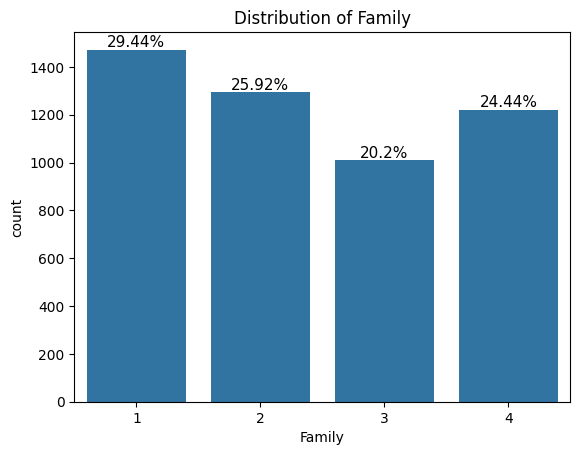

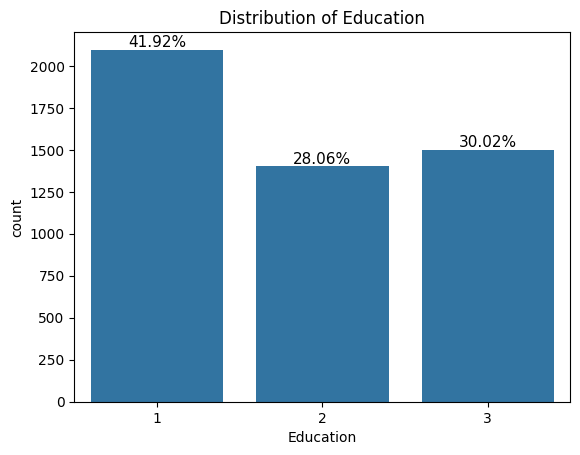

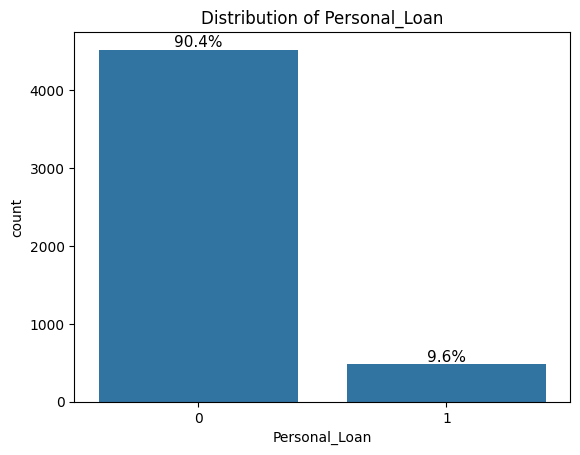

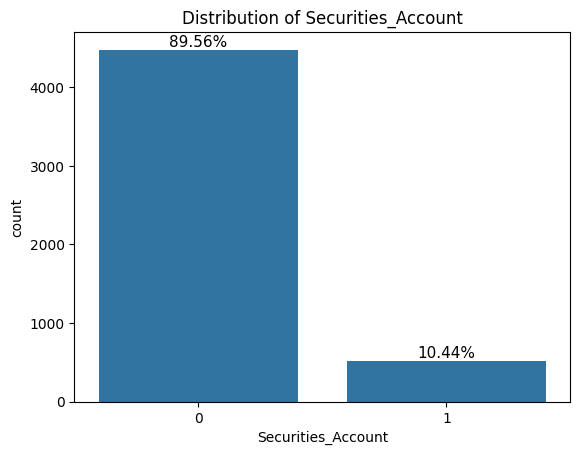

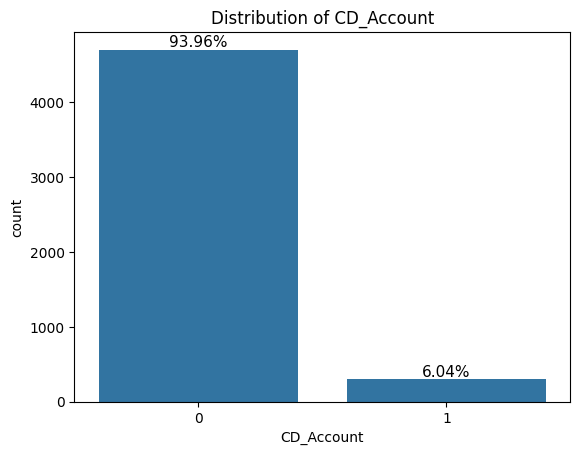

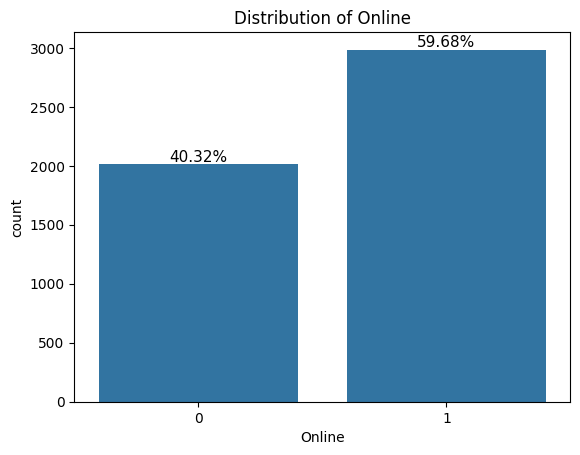

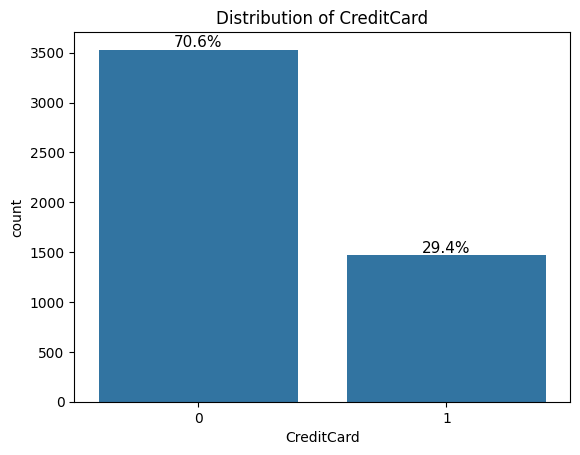

In [26]:
for col in cat_cols:
  if col != 'ZIPCode':
    labelled_countplot(data, col)

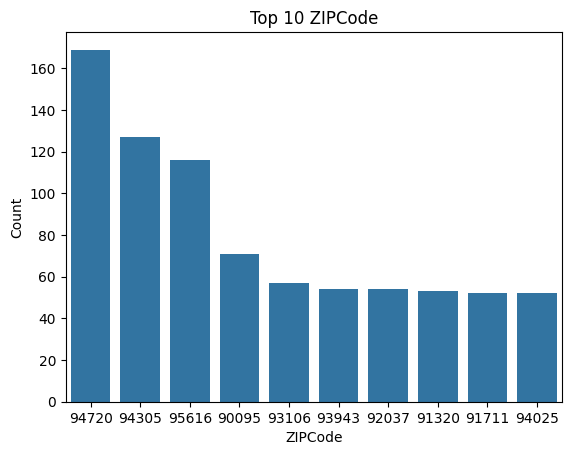

In [27]:
# top 10 zipcode
top10_zipcode = data['ZIPCode'].value_counts().head(10).reset_index()
top10_zipcode.columns = ['ZIPCode', 'Count']
sns.barplot(data= top10_zipcode, x = 'ZIPCode', y = 'Count'
            , order=top10_zipcode.sort_values('Count', ascending=False)['ZIPCode']
)
plt.title('Top 10 ZIPCode')
plt.xlabel('ZIPCode')
plt.ylabel('Count')
plt.show()

#### Observation
* Both mean and median age of the customers is around 45. 75% of the customer is either 35 years old or older than 35 years.
* 75% of customers have 10 years or more professional experience. The average professional experience of the customers is around 20 years which also happens to be the median professional experience.
* The average income of the customers is higher than the median income due to some customers' very high income(outliers in the data).
* Some customers' credit card average spending per month is over \\$5k though 75% of the customers' average spending on credit card is less than or equal \\$2.5k. There are 106 customers who either doesn't have any credit card or they just don't use it.
* 69.24% customers have no mortgage. 5.82% customers have mortgage debt of \\$252.5k or more.
* The family size for 29.4% customers is one, 24.4% customers have family size 4
* Education level for 41.9% customers is undergrad, around 30% customers have advanced professional education level
* 9.4% customers in the dataset have personal loan with AllLife bank
* 10.4% customers have securities account with the bank
* Around 6% customers have certificate deposit account
* Around 59% customers do internet banking
* Around 29% customers use credit card issued by other banks
* Top 5 ZIPcode areas in descending order are 94720, 94305, 95616, 90095 and 93106

### Multivariate analysis

**Multivariate analysis:** (Numerical features vs `Personal_Loan`)

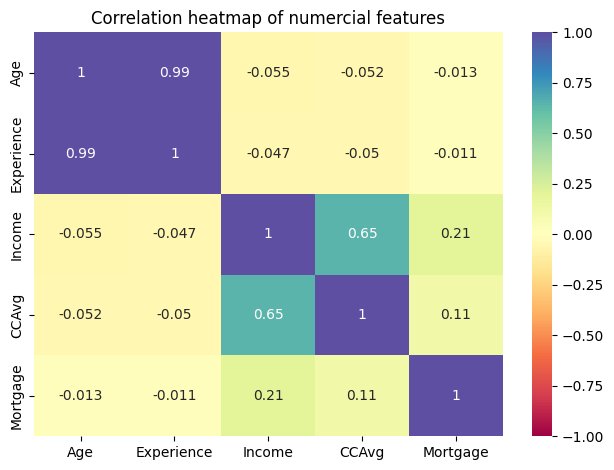

In [28]:
# heatmap
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
plt.title('Correlation heatmap of numercial features')
plt.tight_layout()
plt.show()

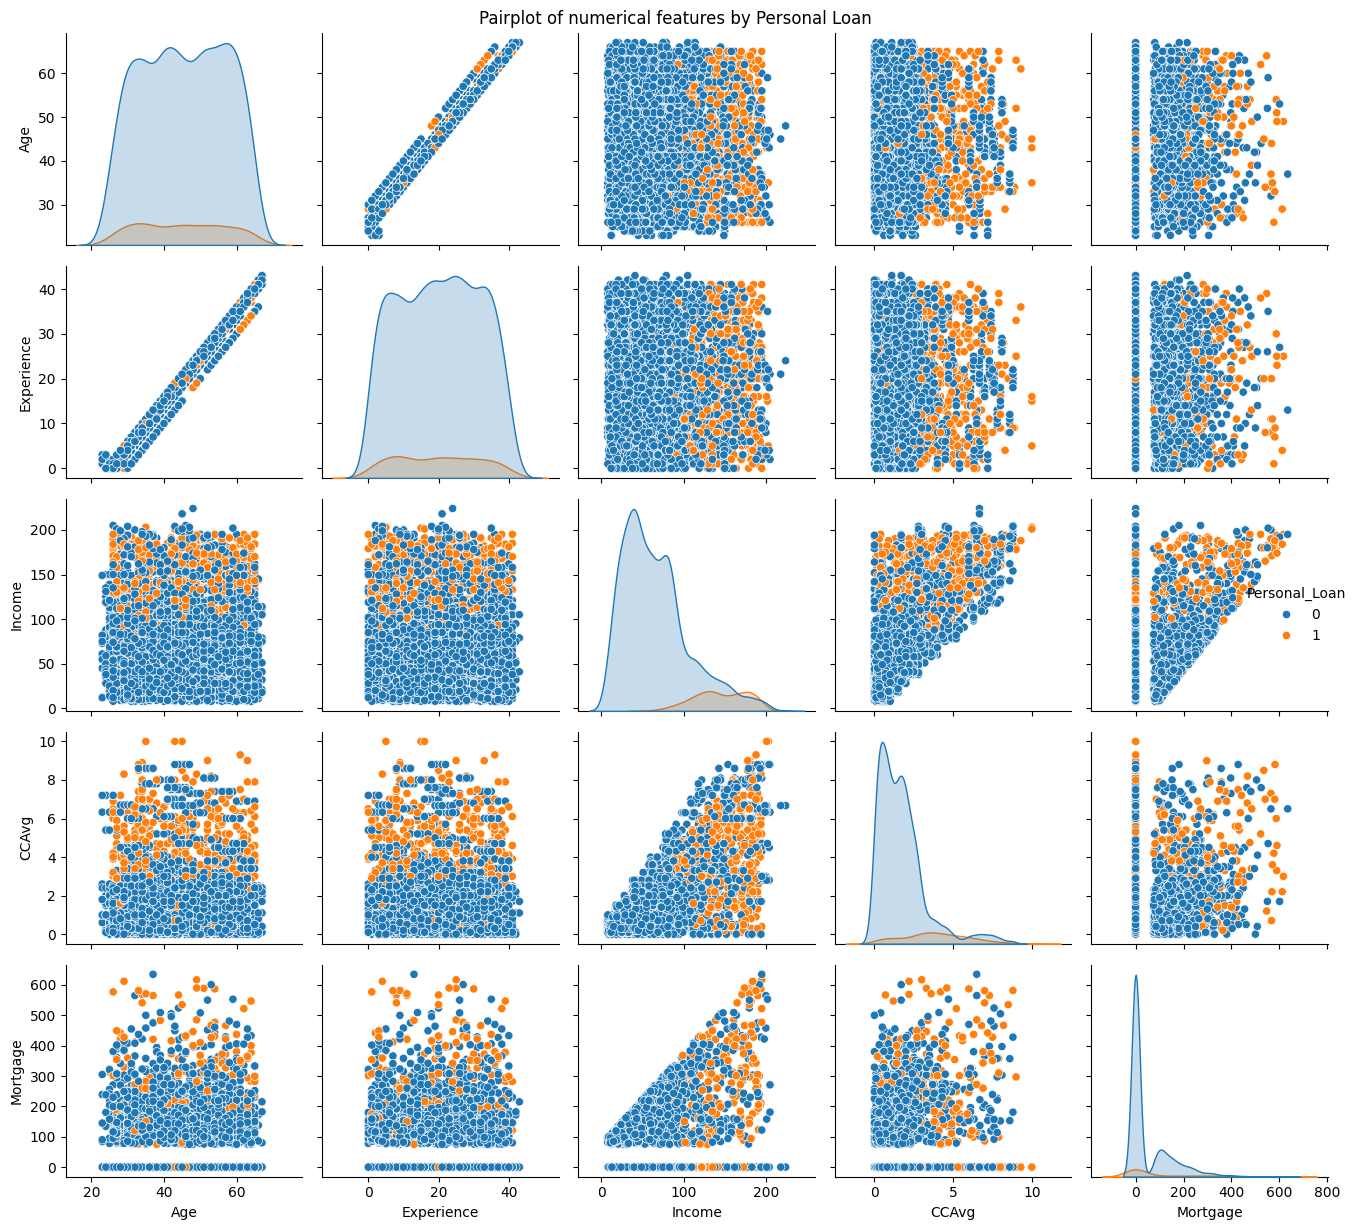

In [29]:
# pairplot
sns.pairplot(data[num_cols + ['Personal_Loan']], hue='Personal_Loan', diag_kind='kde')
plt.suptitle('Pairplot of numerical features by Personal Loan')
plt.tight_layout()
plt.show()

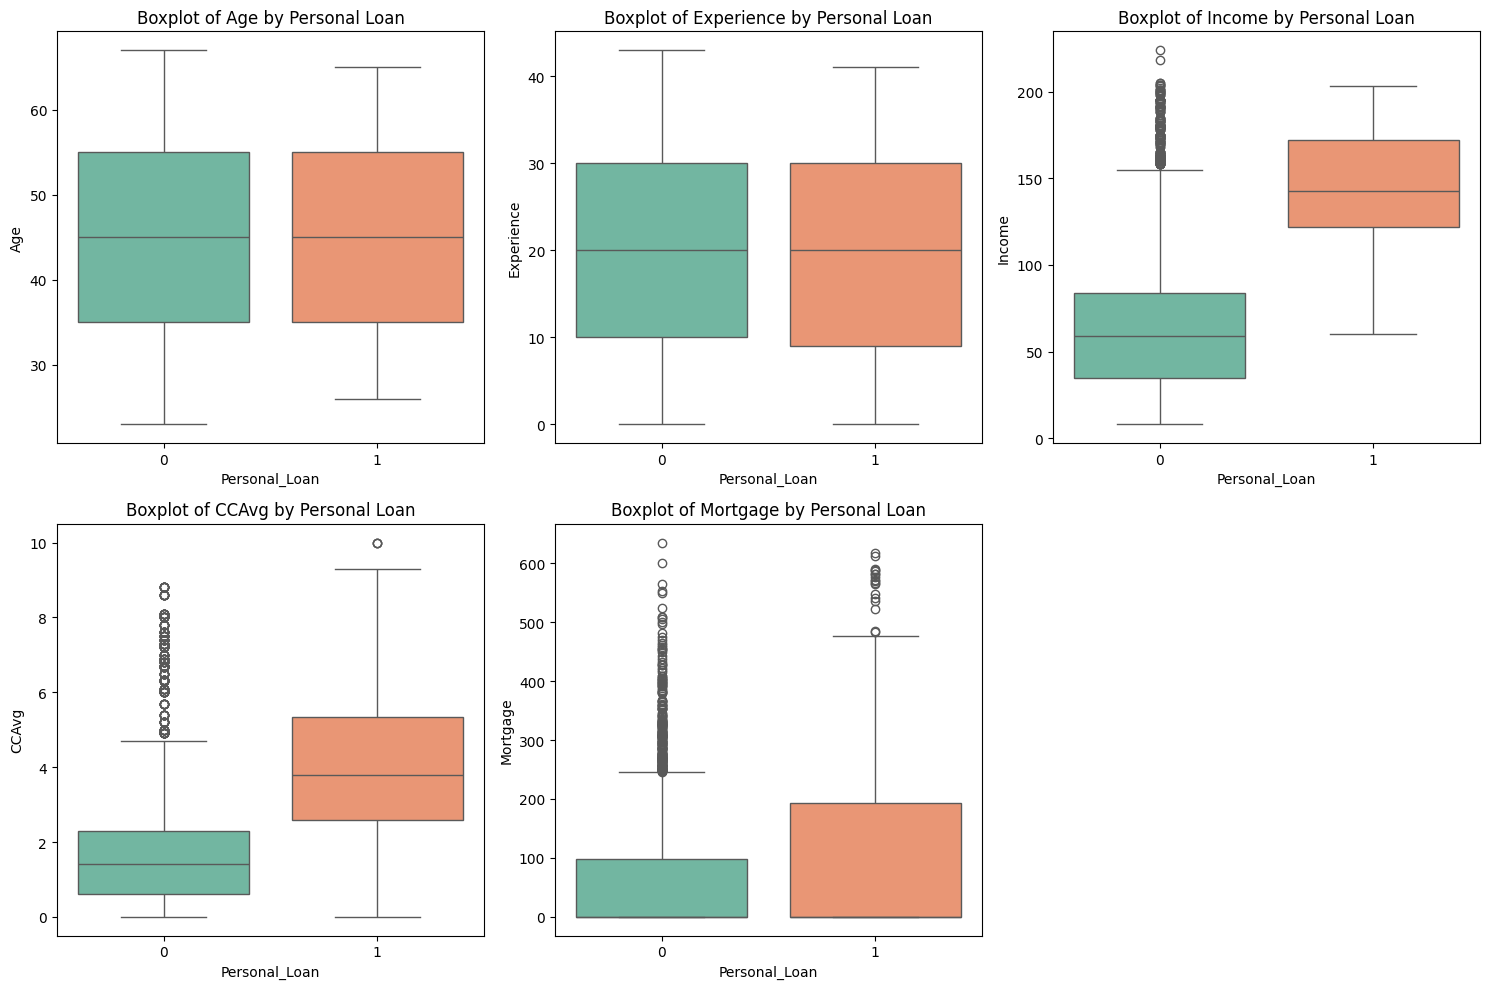

In [30]:
plt.figure(figsize=(15,10))

for i,col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = data, x = 'Personal_Loan', y = col, palette='Set2')
  plt.title(f'Boxplot of {col} by Personal Loan')
  plt.tight_layout()

plt.show()

In [31]:
# 25th percentile of income of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['Income'].quantile(0.25)

122.0

In [32]:
# 25th percentile of monthly credit card spending of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['CCAvg'].quantile(0.25)

2.6

In [33]:
# Customer(who accepted loan offer) count by mortgage status
converted_customer_no_mortgage = data.loc[(data['Mortgage'] == 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
converted_customer_with_mortgage = data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
pd.DataFrame([converted_customer_no_mortgage, converted_customer_with_mortgage], index = ['No Mortgage', 'With Mortgage'], columns = ['Count'])

,Count
No Mortgage,312
With Mortgage,168


In [34]:
# 25th precentile of mortgage debt of the customers who accepted loan offer
data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].quantile(0.25)

174.0

**Multivariate analysis:** (Categorical feature vs `Personal_Loan`)

In [35]:
def stacked_barplot(data, predictor, target):
  denorm_tab = pd.crosstab(data[predictor], data[target])
  print(f'\033[1mCrosstab of {predictor} vs {target}\033[0m')
  print(denorm_tab)
  norm_tab = pd.crosstab(data[predictor], data[target], normalize='index')
  norm_tab.plot(kind='bar', stacked=True)
  plt.title(f'Stacked Barplot of {predictor} by {target}')
  plt.xlabel(predictor)
  plt.ylabel('Percentage')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.show()

Crosstab of Family vs Personal_Loan
Personal_Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


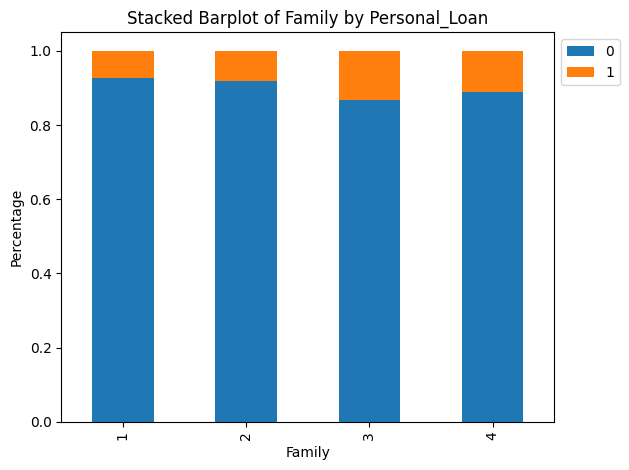


Crosstab of Education vs Personal_Loan
Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


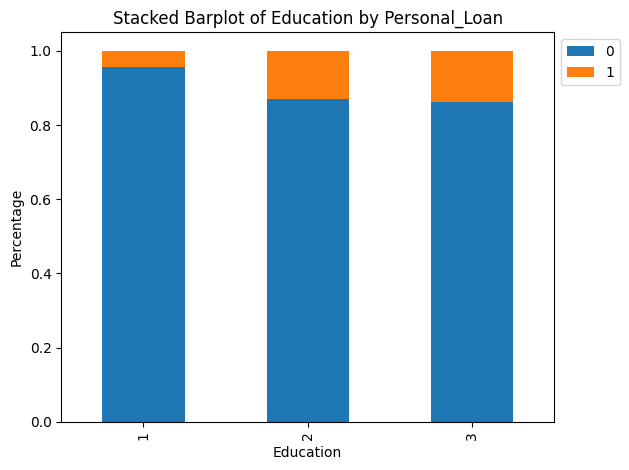


Crosstab of Securities_Account vs Personal_Loan
Personal_Loan          0    1
Securities_Account           
0                   4058  420
1                    462   60


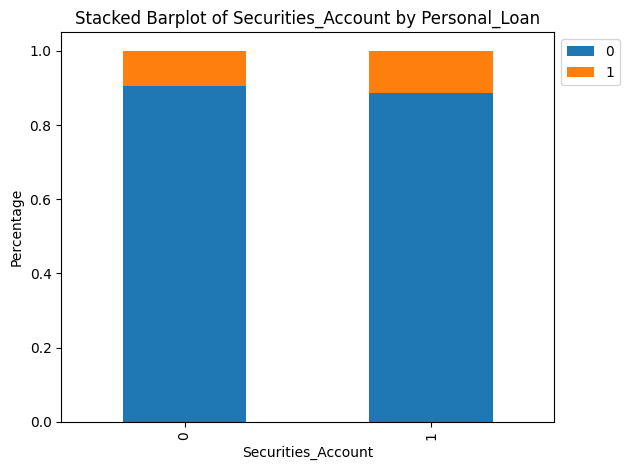


Crosstab of CD_Account vs Personal_Loan
Personal_Loan     0    1
CD_Account              
0              4358  340
1               162  140


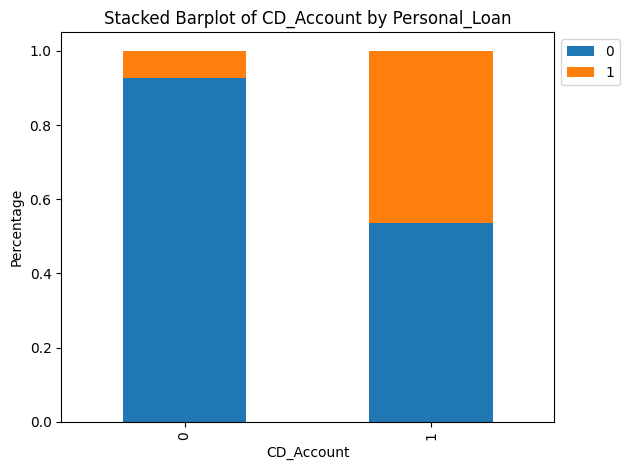


Crosstab of Online vs Personal_Loan
Personal_Loan     0    1
Online                  
0              1827  189
1              2693  291


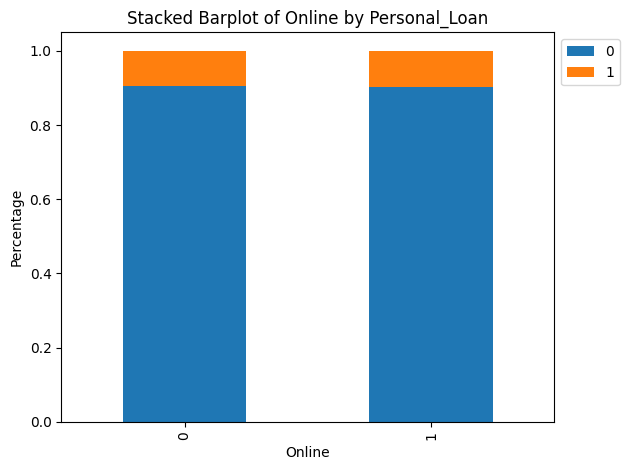


Crosstab of CreditCard vs Personal_Loan
Personal_Loan     0    1
CreditCard              
0              3193  337
1              1327  143


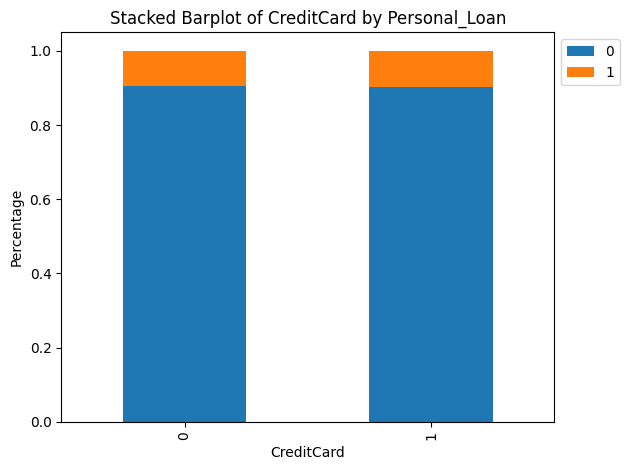

In [36]:
for col in cat_cols:
  if (col != 'ZIPCode') and (col != 'Personal_Loan'):
    stacked_barplot(data, col, 'Personal_Loan')
    print()

**Analysis of ZIPCode**

In [37]:
data['ZIPCode'].nunique()

467

In [38]:
# installing uszipcode python library, we will use it to extract more information about ZIPCode
!pip install uszipcode "sqlalchemy_mate>=1.4.28.3,<2.0.0.0"

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6940 sha256=776846775206d13781aaa0534fc54a64df0ceaf42da62dd6ba7987643037b1f7
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 w

In [39]:
from uszipcode import SearchEngine
warnings.filterwarnings("ignore", category=UserWarning, module="uszipcode")
search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)
def get_zipcode_info(zipcode):
  result = None
  try:

    result = search.by_zipcode(zipcode)
  except Exception as e:
    pass
  finally:
     if result:
            return {
                'zipcode': result.zipcode,
                'city': result.major_city,
                'state': result.state,
            }
     else:
            return {
                'zipcode': zipcode,
                'city': None,
                'state': None,
            }

Download /root/.uszipcode/comprehensive_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/comprehensive_db.sqlite ...
  50.00 MB downloaded ...
  100.00 MB downloaded ...
  150.00 MB downloaded ...
  200.00 MB downloaded ...
  250.00 MB downloaded ...
  300.00 MB downloaded ...
  350.00 MB downloaded ...
  400.00 MB downloaded ...
  Complete!


In [40]:
zipcode_info = data['ZIPCode'].apply(get_zipcode_info)
search.close()
zipcode_info_df = pd.DataFrame(zipcode_info.tolist())
zipcode_info_df.head()

,zipcode,city,state
0,91107,Pasadena,CA
1,90089,Los Angeles,CA
2,94720,Berkeley,CA
3,94112,San Francisco,CA
4,91330,Northridge,CA


In [41]:
zipcode_info_df['state'].nunique()

1

In [42]:
zipcode_info_df.isnull().sum()

,0
zipcode,0
city,34
state,34


In [43]:
zipcode_info_df['city'].nunique()

244

* We have 467 unique ZIPCode in the dataset
* Using uszipcode library we have identified these ZIPCodes belong to 244 cities but there are 34 ZIPCode which was not possible to be mapped to any city. We can map those ZIPCode to value 'Other'

In [44]:
# mapping null city to others
zipcode_info_df['city'].fillna('Other', inplace=True)
zipcode_info_df['city'].isnull().sum()

0

In [45]:
data['City'] = zipcode_info_df['city']

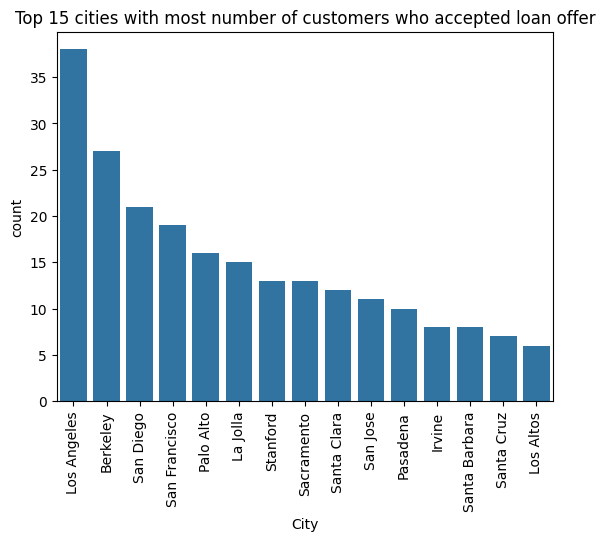

In [46]:
loan_offer_by_city = data.groupby('City')['Personal_Loan'].value_counts().reset_index()
data_to_plot = loan_offer_by_city[loan_offer_by_city['Personal_Loan'] == 1].sort_values('count', ascending=False).head(15)
sns.barplot(data=data_to_plot, x='City', y='count')
plt.xticks(rotation=90)
plt.title('Top 15 cities with most number of customers who accepted loan offer')
plt.show()

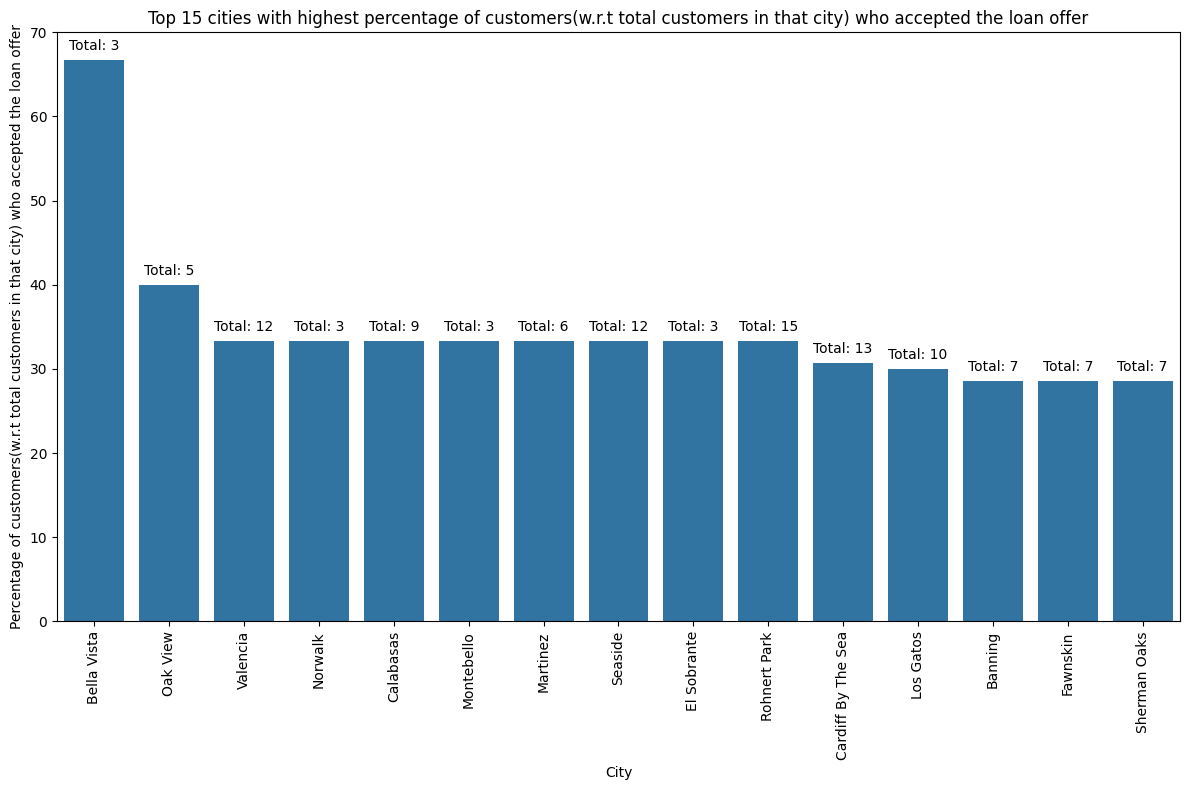

In [47]:
def percentage_by_city_customer(data):
  Total_customer_in_the_city = loan_offer_by_city.loc[loan_offer_by_city['City'] == data['City']]['count'].sum()
  percentage = (data['count']/Total_customer_in_the_city)*100
  return percentage, Total_customer_in_the_city
loan_offer_by_city[['Percentage', 'Total_customer_in_the_city']] = loan_offer_by_city.apply(
    lambda row: percentage_by_city_customer(row), axis=1, result_type='expand'
)
TopCity_by_acceptance_percentage = loan_offer_by_city[loan_offer_by_city['Personal_Loan'] == 1].sort_values('Percentage', ascending=False).head(15)
plt.figure(figsize=(12,8))
ax = sns.barplot(data=TopCity_by_acceptance_percentage, x='City', y='Percentage')
ax.bar_label(ax.containers[0], labels=[f'Total: {int(val)}' for val in TopCity_by_acceptance_percentage['Total_customer_in_the_city']], padding=5)
plt.xticks(rotation=90)
plt.title('Top 15 cities with highest percentage of customers(w.r.t total customers in that city) who accepted the loan offer')
plt.ylabel('Percentage of customers(w.r.t total customers in that city) who accepted the loan offer')
plt.tight_layout()
plt.show()

**Chi-square test - Catgorical feature vs `Personal_Loan`**

In [48]:
def chi_square_test(data, predictor, target):
  crosstab = pd.crosstab(data[predictor], data[target])
  Ho = f"{predictor} has no effect on {target}"  # Stating the Null Hypothesis
  Ha = f"{predictor} has an effect on {target}"  # Stating the Alternate Hypothesis

  chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

  if p_value < 0.05:  # Setting our significance level at 5%
      print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
  else:
      print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

In [49]:
refined_index = (np.array(cat_cols) != 'Personal_Loan') & (np.array(cat_cols) != 'ZIPCode')
refined_cat_cols = np.array(cat_cols)[refined_index]
refined_cat_cols = np.append(refined_cat_cols, 'City')
for col in refined_cat_cols:
  chi_square_test(data, col, 'Personal_Loan')
  print()

Family has an effect on Personal_Loan as the p_value (0.0) < 0.05

Education has an effect on Personal_Loan as the p_value (0.0) < 0.05

Securities_Account has no effect on Personal_Loan as the p_value (0.141) > 0.05

CD_Account has an effect on Personal_Loan as the p_value (0.0) < 0.05

Online has no effect on Personal_Loan as the p_value (0.693) > 0.05

CreditCard has no effect on Personal_Loan as the p_value (0.884) > 0.05

City has no effect on Personal_Loan as the p_value (0.869) > 0.05



#### Observations
* There is a strong positive correlation between experience and age. There is also a positive correlation between income and average monthly credit card spending.
* From the pair plot and the box plot of numerical features against `Personal_Loan` we observe the following:<br />
  * Customers who accepted loan offer, 75% of them have annual income \\$122k or more
  * Customers who accepted loan offer, 75% of them have credit card spending around \\$2.6k or more
  * Customers who accepted loan offer, 312 of them have no mortgage compared to only 168 of them have mortage.Customers with mortgage who accepted loan offer 75% of them have mortgage debt of \\$174k or more
* Customers who have certificate of deposit (CD) account with the bank, 46% of them  have accepted the loan offer.
* Customers with family size 3 and 4 have accepted the offer more than the customers of family size 1 and 2.
* Customers with graduate level or advanced/professional level education accepted the loan offer more compared to customers with undergraduate level.
* Los Angeles, Barkeley and Sandiago are top 3 cities repectively in terms of customers accepting loan offers.
* Bella Vista and Oak View are top two cities in-terms of percentage of customers w.r.t total number of customers in those respective city, However, total size of customers are very small in those cities.
* Using Chi Squared test we observed that `Family`, `Education`, `CD_Account` features have correlation with the target variable `Personal_Loan`
* Chi Squared test suggests `Securities_Account`, `Online`, `CreditCard` and `City` feature has no effect on target variable `Personal_Loan`





## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

####Feature Engineering
* We are going to drop `ZIPCode` feature as we mapped this feature to `City`
* We can drop `City` feature as from Chi squared test we observed it has no impact on our target variable `Personal_Loan`, however, instead of dropping it now, we will keep the cities where 7 or more customers accepted the loan offer and label all other cities as 'Other'

In [50]:
data.drop(columns='ZIPCode', inplace=True) # dropping zipcode
data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge
5,37,13,29,4,0.4,2,155,0,0,0,1,0,San Diego
6,53,27,72,2,1.5,2,0,0,0,0,1,0,Claremont
7,50,24,22,1,0.3,3,0,0,0,0,0,1,Monterey
8,35,10,81,3,0.6,2,104,0,0,0,1,0,Los Angeles
9,34,9,180,1,8.9,3,0,1,0,0,0,0,Ojai


In [51]:
Cities = loan_offer_by_city[(loan_offer_by_city['Personal_Loan'] == 1) & (loan_offer_by_city['count'] >= 7) ]['City']
Cities.reset_index(drop=True, inplace=True)
data['City'] = data['City'].apply(lambda x: x if x in Cities.values else 'Other')

In [52]:
data['City'].value_counts()

,count
City,
Other,2885
Los Angeles,375
San Diego,269
San Francisco,257
Berkeley,241
Sacramento,148
Palo Alto,130
Stanford,127
La Jolla,112


In [53]:
data = pd.get_dummies(data, columns=['City'], drop_first=True, dtype=int)

In [54]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,...,City_Palo Alto,City_Pasadena,City_Sacramento,City_San Diego,City_San Francisco,City_San Jose,City_Santa Barbara,City_Santa Clara,City_Santa Cruz,City_Stanford
0,25,1,49,4,1.6,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data preparation for model building

In [55]:
# define explanatory features and target feature
X = data.drop(columns='Personal_Loan')
y = data['Personal_Loan']
X.shape, y.shape

((5000, 25), (5000,))

In [56]:
# splitting the data in an 70:30 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [57]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 25)
Shape of test set: (1500, 25) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* We can use following metrics to evaluate our models
  * **Accuracy:** Generalizes proportion of the correct prediction
  * **Recall:** The higher the recall value, the lower the false negative prediction
  * **Precision:** The higher the precision value, the lower the false positive prediction
  * **F1 Score:** The higher the F1 score, the lower the false positive and false negative in the prediction
* All Life bank wants to maximise the conversion for their loan campaign. So, the higher the false negative prediction, the higher the probabilty that the bank will loose potential loan customers.
* Though predicting false positive will increase the conversion cost of the campaign, false negative prediction will likely cost more in this case.
* So our goal is to maximise recall to reduce false negative predictions


In [129]:
def model_performance(estimator, X, y):
  y_pred = estimator.predict(X)
  accuracy = accuracy_score(y, y_pred)
  recall = recall_score(y, y_pred)
  precision = precision_score(y, y_pred)
  f1 = f1_score(y, y_pred)
  df = pd.DataFrame([accuracy, recall, precision, f1], index=['Accuracy', 'Recall', 'Precision', 'F1 Score'], columns=['Score'])
  return df.T

def confusion_matrix_plot(estimator, X, y, title = 'Confusion Matrix'):
  y_pred = estimator.predict(X)
  cm = confusion_matrix(y, y_pred)
  labels = np.asarray(
        [
           ["{0:0.0f}".format(item) + "\n {0:.2%}".format((item)/cm.flatten().sum())]
           for item in cm.flatten()
        ]
    ).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="")
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

### Model Building

In [67]:
def visualize_tree(estimator, features, figsize=(25,20)):
    plt.figure(figsize=figsize)
    out = tree.plot_tree(
        decision_tree = estimator,
        feature_names = features,
        filled = True,
        fontsize = 9,
        node_ids= True)
    plt.show()

def print_tree(estimator, features):
    tree_rules = tree.export_text(estimator, feature_names=features, show_weights = True)
    print(tree_rules)

In [139]:
def plot_feature_importance(estimator, features):
  feature_importances = estimator.feature_importances_
  indices = np.argsort(feature_importances)
  plt.figure(figsize=(15,8))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), feature_importances[indices], color='violet', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

In [79]:
RS = 1 # random state

#### Default model

In [80]:
# decision tree model with all features
model_default = DecisionTreeClassifier(random_state=RS)
model_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [81]:
# Performance on train set
model_default_train_perf = model_performance(model_default, X_train, y_train)
model_default_train_perf.index.values[0] = 'Default model train score'
model_default_train_perf

,Accuracy,Recall,Precision,F1 Score
Default model train score,1.0,1.0,1.0,1.0


In [82]:
model_default_test_perf = model_performance(model_default, X_test, y_test)
model_default_test_perf.index.values[0] = 'Default model test score'
model_default_test_perf

,Accuracy,Recall,Precision,F1 Score
Default model test score,0.976,0.888889,0.864865,0.876712


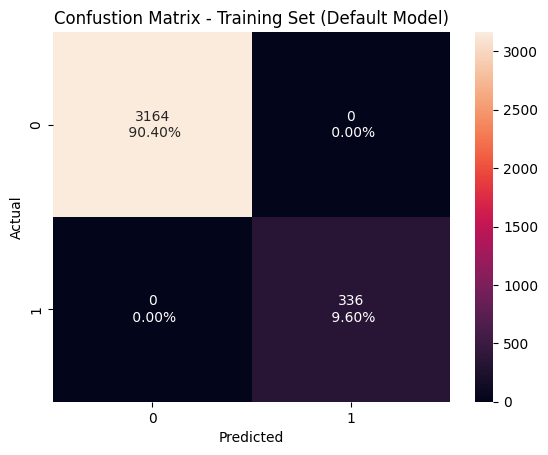

In [130]:
confusion_matrix_plot(model_default, X_train, y_train, title = 'Confustion Matrix - Training Set (Default Model)')

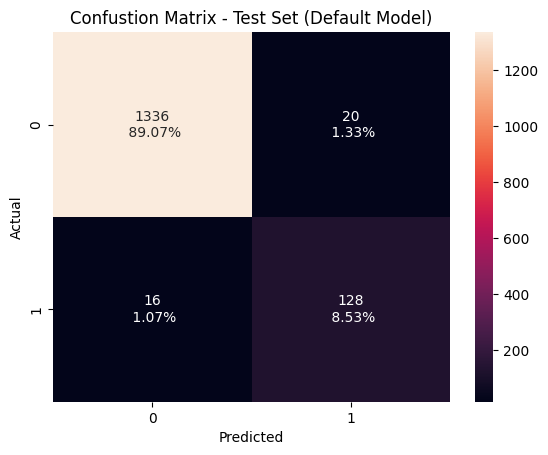

In [131]:
confusion_matrix_plot(model_default, X_test, y_test,  title = 'Confustion Matrix - Test Set (Default Model)')

In [97]:
# Training Set vs Test Set
train_vs_test_default = pd.concat([model_default_train_perf, model_default_test_perf], axis=0)
train_vs_test_default

,Accuracy,Recall,Precision,F1 Score
Default model train score,1.000,1.000000,1.000000,1.000000
Default model test score,0.976,0.888889,0.864865,0.876712


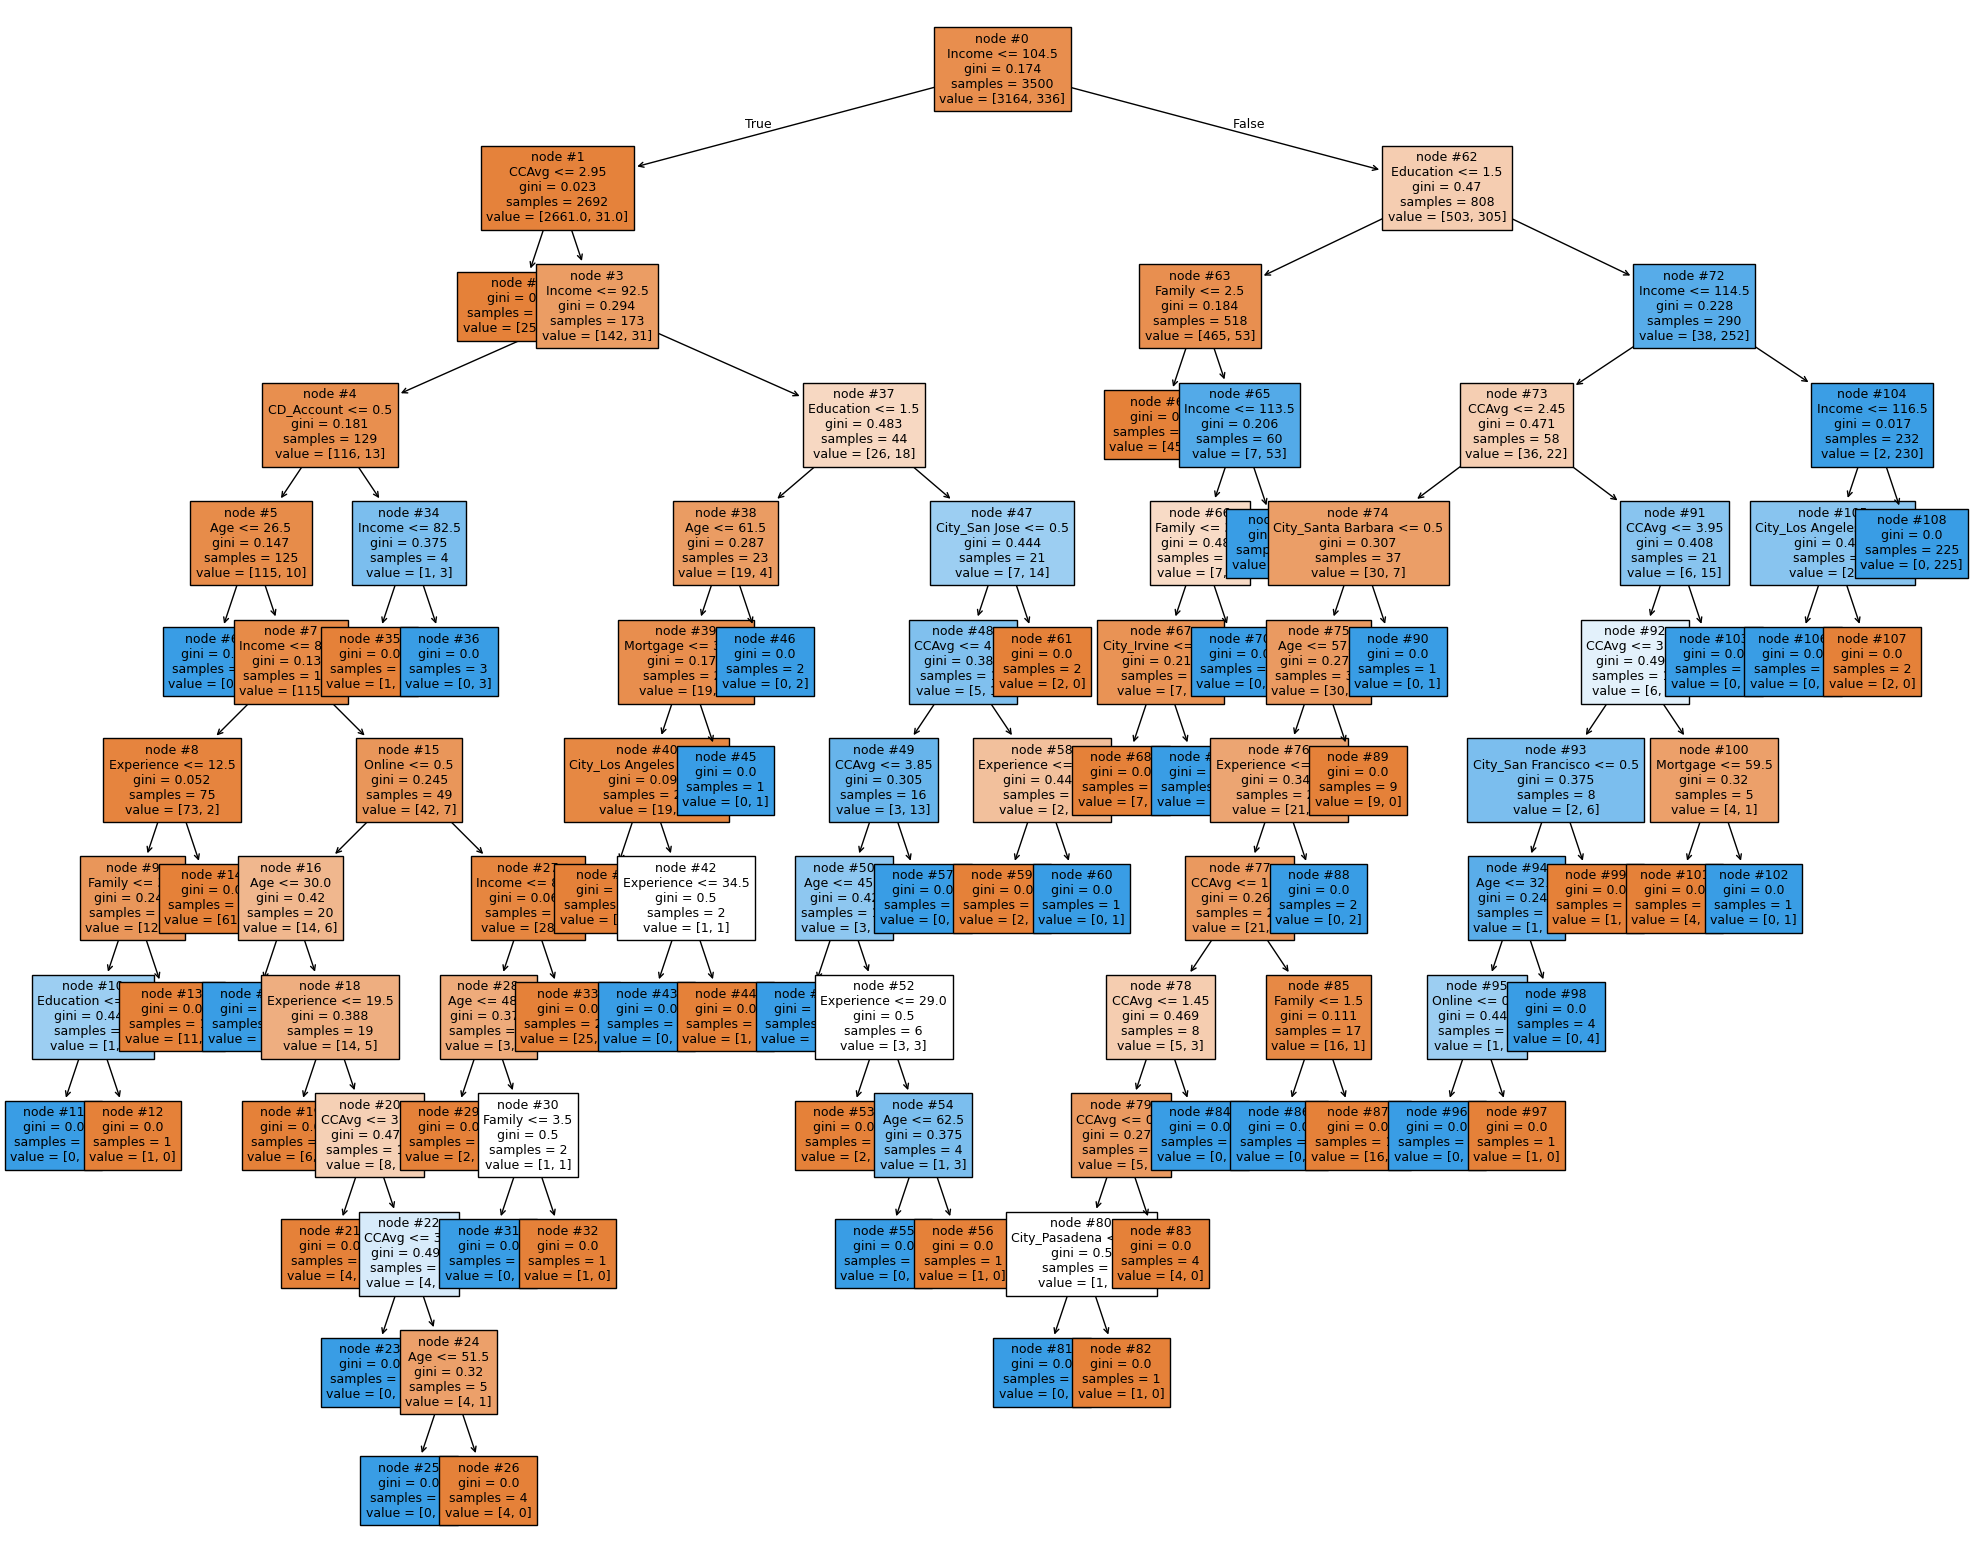

In [86]:
visualize_tree(model_default, X_train.columns)

In [87]:
print_tree(model_default, X_train.columns)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- Onl

In [89]:
model_default.get_depth(), model_default.get_n_leaves() # tree depth and no of leaves

(12, 55)

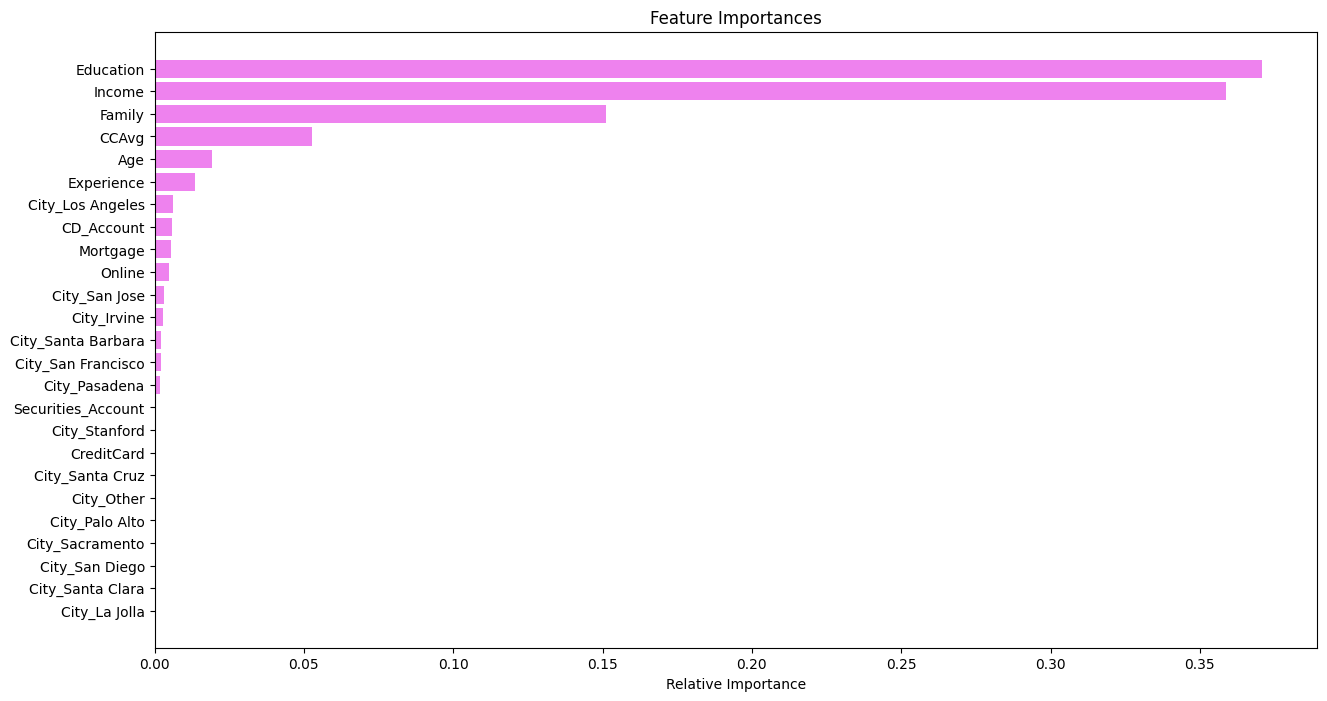

In [140]:
plot_feature_importance(model_default, X_train.columns)

##### Observation
* There is a considerable difference in Recall, Precision and F1 score between training set and test set, indicating that the model is overfitting.
* The default model has depth 12 and it has 55 leaves
* `Education`, `Income` and `Family` are the 3 most important features respectively followed by  `CCAvg`, `Age` and `Experience`


## Model Performance Improvement

### Pre-pruning

In [119]:
#hyper parmeters for pre-prunning
max_depth_values = np.arange(2,12,2)
max_leaf_node_values = np.arange(10,60,10)
min_samples_split_values = np.arange(5, 55, 10)
criteria = ['gini', 'entropy']
splitter = ['best', 'random']


In [121]:
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0
for criterion in criteria:
  for splitter_ in splitter:
    for max_depth in max_depth_values:
      for max_leaf_nodes in max_leaf_node_values:
        for min_samples_split in min_samples_split_values:
          model_pre_prunning = DecisionTreeClassifier(random_state=RS, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split)
          model_pre_prunning.fit(X_train, y_train)

          y_train_pred = model_pre_prunning.predict(X_train)
          y_test_pred = model_pre_prunning.predict(X_test)

          # recall score
          train_score = recall_score(y_train, y_train_pred)
          test_score = recall_score(y_test, y_test_pred)

          score_diff = abs(train_score - test_score) # score difference between train and test data

          if (score_diff < best_score_diff) & (test_score > best_test_score):
            best_estimator = model_pre_prunning
            best_score_diff = score_diff
            best_test_score = test_score

best_pre_prunned_model = best_estimator

print("Best parameters found:")
print("Max depth:", best_pre_prunned_model.max_depth)
print("Max leaf nodes:", best_pre_prunned_model.max_leaf_nodes)
print("Min samples split:", best_pre_prunned_model.min_samples_split)
print("Best test recall score:", best_test_score)
print("Best score difference:", best_score_diff)
print("Best splitter:", best_pre_prunned_model.splitter)
print("Best criterion:", best_pre_prunned_model.criterion)

Best parameters found:
Max depth: 8
Max leaf nodes: 20
Min samples split: 25
Best test recall score: 0.9166666666666666
Best score difference: 0.017857142857142905
Best splitter: best
Best criterion: gini


In [122]:
train_perf_pre_pruned_model = model_performance(best_pre_prunned_model, X_train, y_train)
train_perf_pre_pruned_model.index.values[0] = 'Pre-pruned model train score'
train_perf_pre_pruned_model

,Accuracy,Recall,Precision,F1 Score
Pre-pruned model train score,0.989143,0.934524,0.951515,0.942943


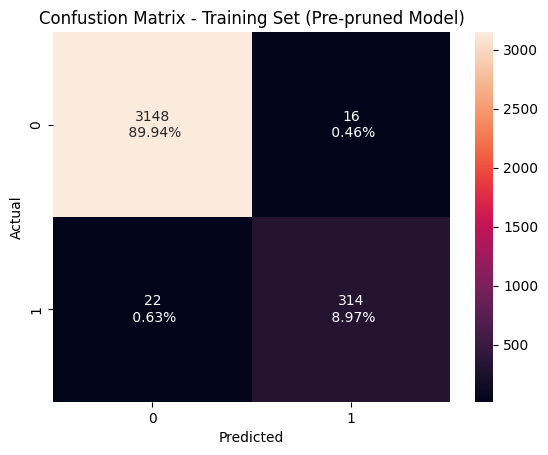

In [132]:
confusion_matrix_plot(best_pre_prunned_model, X_train, y_train, title = 'Confustion Matrix - Training Set (Pre-pruned Model)')

In [123]:
test_perf_pre_pruned_model = model_performance(best_pre_prunned_model, X_test, y_test)
test_perf_pre_pruned_model.index.values[0] = 'Pre-pruned model test score'
test_perf_pre_pruned_model

,Accuracy,Recall,Precision,F1 Score
Pre-pruned model test score,0.984,0.916667,0.916667,0.916667


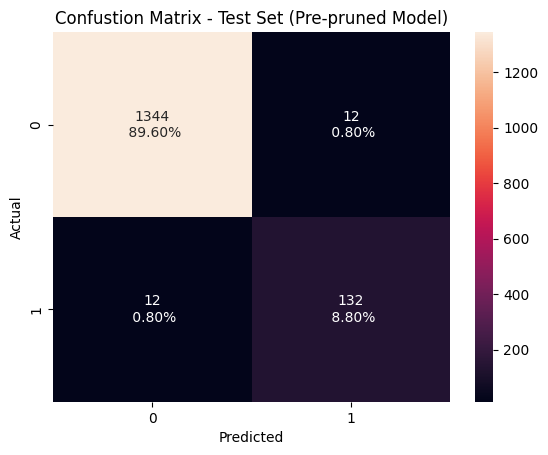

In [133]:
confusion_matrix_plot(best_pre_prunned_model, X_test, y_test,  title = 'Confustion Matrix - Test Set (Pre-pruned Model)')

In [124]:
train_vs_test_pre_pruned_model = pd.concat([train_perf_pre_pruned_model, test_perf_pre_pruned_model], axis=0)
train_vs_test_pre_pruned_model

,Accuracy,Recall,Precision,F1 Score
Pre-pruned model train score,0.989143,0.934524,0.951515,0.942943
Pre-pruned model test score,0.984000,0.916667,0.916667,0.916667


In [125]:
model_comparison = pd.concat([train_vs_test_default, train_vs_test_pre_pruned_model], axis=0)
model_comparison

,Accuracy,Recall,Precision,F1 Score
Default model train score,1.000000,1.000000,1.000000,1.000000
Default model test score,0.976000,0.888889,0.864865,0.876712
Pre-pruned model train score,0.989143,0.934524,0.951515,0.942943
Pre-pruned model test score,0.984000,0.916667,0.916667,0.916667


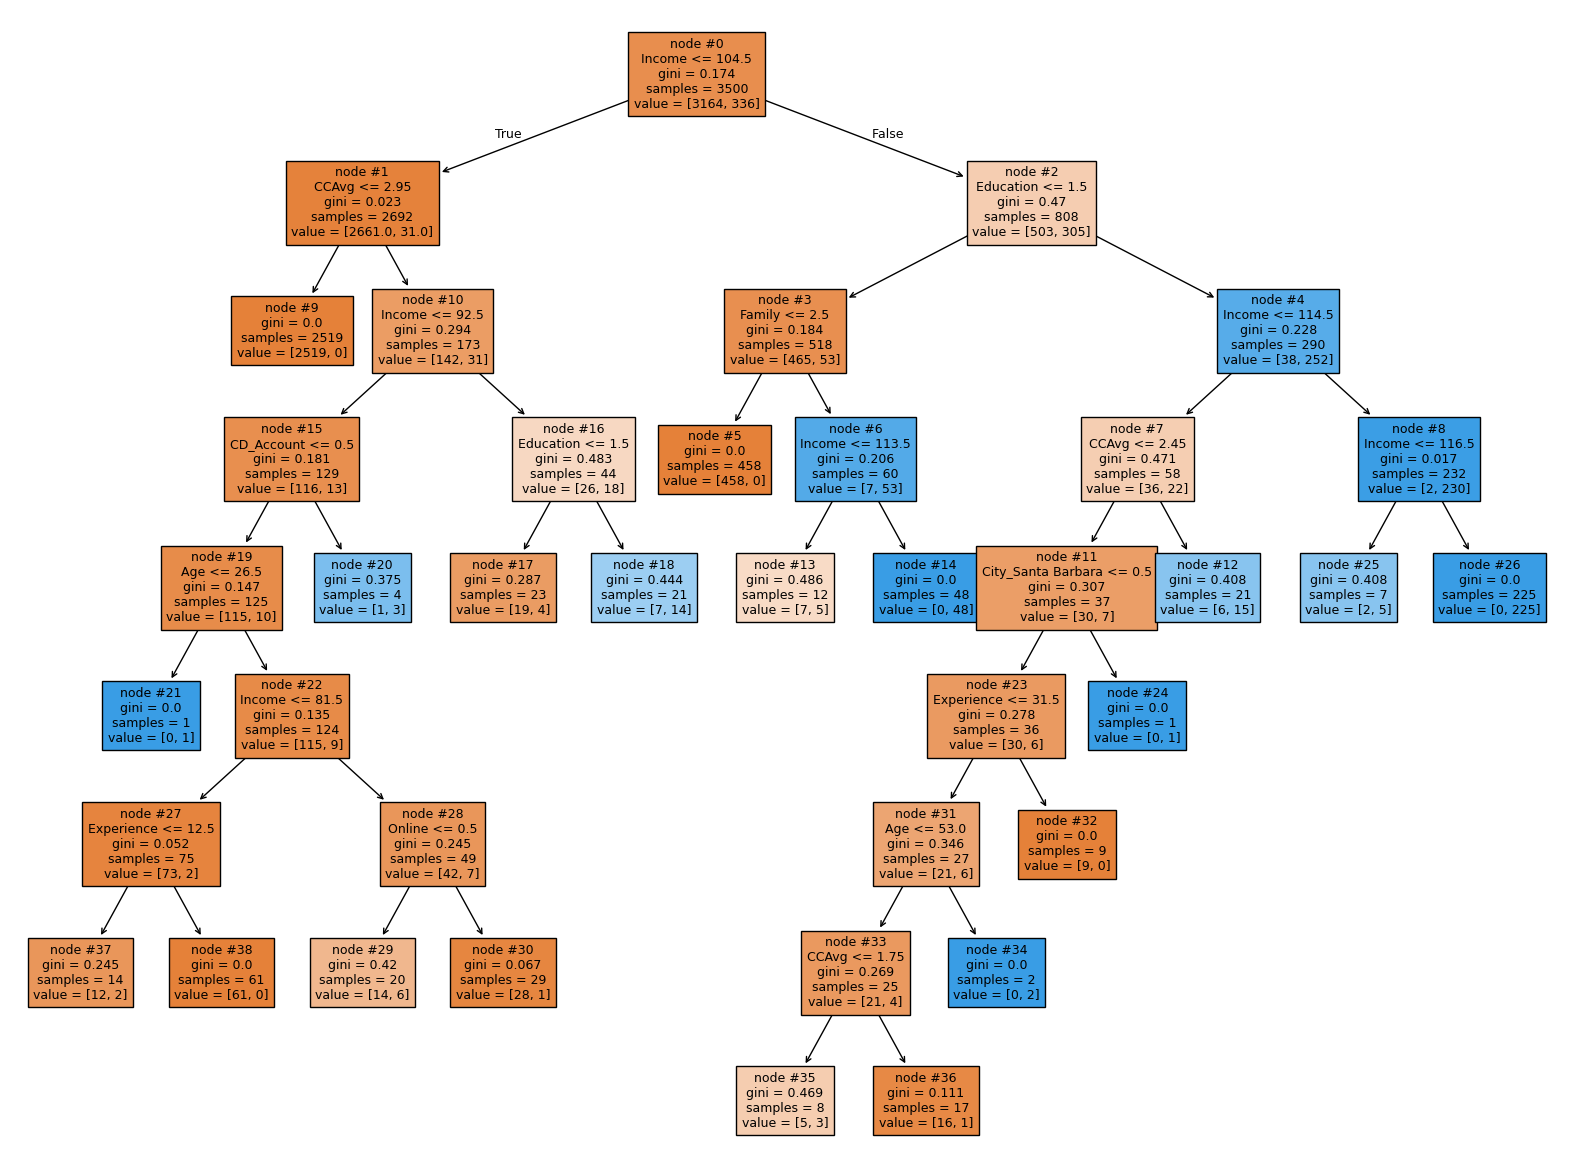

In [135]:
visualize_tree(best_pre_prunned_model, X_train.columns, figsize=(20,15))

In [137]:
print_tree(best_pre_prunned_model, X_train.columns)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2519.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |   |--- weights: [12.00, 2.00] class: 0
|   |   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  81.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- weights: [14.00, 6.00] class: 0
|   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |--- weights: [28.00, 1.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [1.00, 3.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   

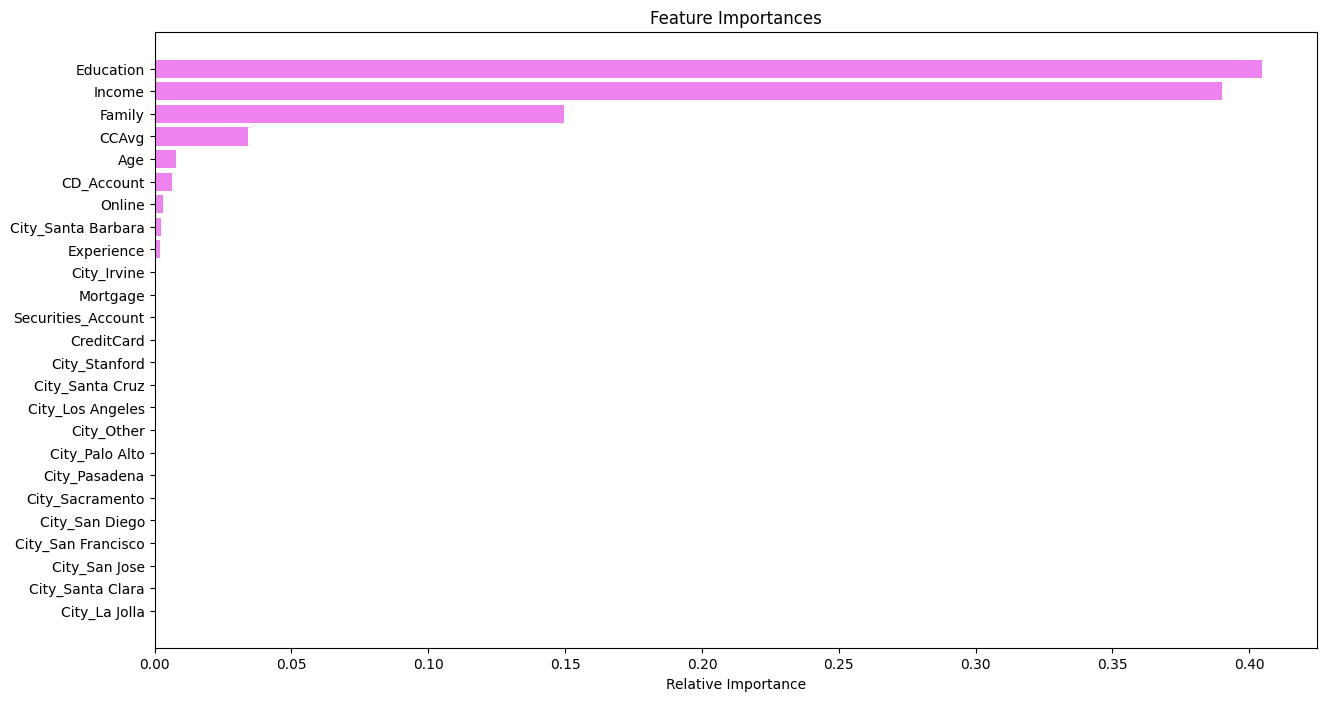

In [141]:
plot_feature_importance(best_pre_prunned_model, X_train.columns)

#### Observation
* The best model found after appying the pre-pruning has the following attributes:
  * Max depth: 8
  * Max leaf nodes: 20
  * Min samples split: 25
  * Best test recall score: 0.9166666666666666
  * Best splitter: best
  * Best criterion: gini
So, the model has been simplified compared to the default model
* It has better recall score in the test set compared to the default model. From the confusion matrix we observe that the false negative prediction has been lower in the pre-pruned simplified model than that of the default model.
* There is no considerable difference among evaluation metrics of test dataset and train dataset. This implies that this model is not overfitting, rather, generalizing well.
* `Education`, `Income` and `Family` are the 3 most important features respectively, followed by `CCAvg`, `Age` and `CD_Account`   



### Post pruning

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___